In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("german_credit_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.rename(columns={
    'Saving accounts': 'saving_accounts'
    ,'Checking account': 'checking_account'
    ,'Credit amount': 'credit_amount'}, inplace=True)

Features
This dataset is available on the kaggle platform. The aim is to determine the risk of a bank credit given to customers. The risk status of the customers for the new credit will be determined by using some machine learning, artificial neural network model with this dataset. The dataset includes the following features:
Age: This variable bank contains the age information of the customers.

Sex: This variable contains the gender information of the bank customers.

Job: This variable contains occupational information of bank customers. Professions are divided into four categories according to skill level. (0 - unskilled and nonresident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing: This variable includes the housing status of the bank customers.

Saving Accounts: This variable bank contains customers savings information.Customers savings are classified as little, moderate, quite rich, rich.

Checking Accounts: This variable show the cash in the accounts of bank customers.

Credit Amount: This variable shows how much credit the bank customers get.

### Exploratory data Analysis

In [6]:
#null values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
saving_accounts     183
checking_account    394
credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

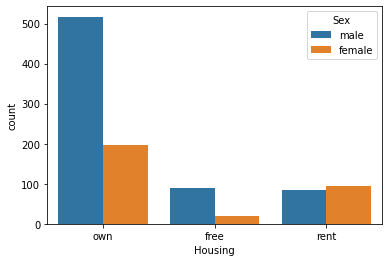

In [7]:
#how housing varies between male and female
sns.countplot(data=df, x='Housing', hue='Sex')
plt.show()

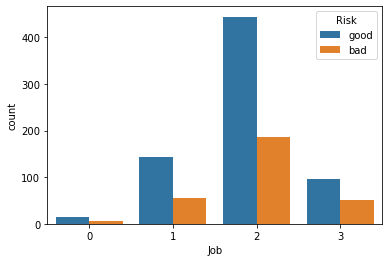

In [8]:
#how risk varies between different type of job holders
sns.countplot(data=df, x='Job', hue='Risk')
plt.show()

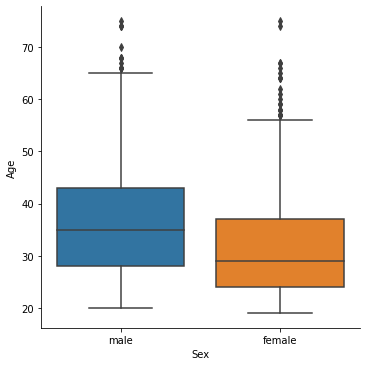

In [9]:
# Average age of male of female
sns.catplot(data=df, x='Sex', y='Age', kind='box')
plt.show()

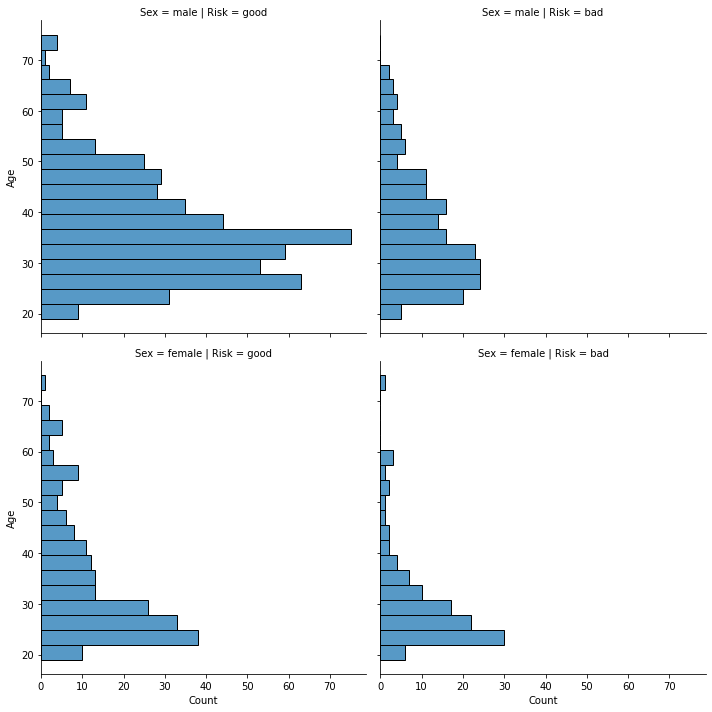

In [10]:
# how risk varies between different age group of male and female
sns.displot(data=df, row='Sex', y='Age', col='Risk')
plt.show()

In [11]:
import seaborn as sns
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df1)

NameError: name 'df1' is not defined

### Feature Engineering

In [ ]:
# Could Credit Amount be better represented?

# Let's see how is credit amount distributed
sns.displot(df['credit_amount'])
plt.show()

# Another way to represent long tail numerical distributions is to transform them
# using e.g., a log function
sns.displot(np.log10(df['credit_amount']))
plt.show()

# Apply the new distribution to the dataset
df['credit_amount'] = np.log10(df['credit_amount'])

In [ ]:
# Could age be better represented?

# Let's see how age is distributed
sns.displot(df['Age'])
plt.show()

#Let us split age into categories
interval = (18, 25, 35, 60, 120)
cats = ['Young Adult', 'Adult', 'Senior', 'Elder']
df["Age_cat"] = pd.cut(df['Age'], interval, labels=cats)

In [ ]:
df

In [ ]:
categorical_cols = ['Sex', 'Housing', 'saving_accounts', 'checking_account','Purpose','Risk','Age_cat'] 

#import pandas as pd
df1 = pd.get_dummies(df, columns = categorical_cols)

In [ ]:
df1.columns = df1.columns.str.replace(' ','_')

In [ ]:
df1.columns = df1.columns.str.replace('/','_')

In [ ]:
df1.columns

In [ ]:
# # representing categorical values---one hot encoding

# df1 = pd.get_dummies(df.Sex, prefix='Sex')
# df2 = pd.get_dummies(df.Housing, prefix='Housing')
# df3 = pd.get_dummies(df['Saving accounts'], prefix='Saving')
# df4 = pd.get_dummies(df['Checking account'], prefix='Checking')
# df5 = pd.get_dummies(df.Purpose, prefix='Purp')
# df6 = pd.get_dummies(df.Risk, prefix='Risk')
# df7 = pd.get_dummies(df.Age_cat, prefix='Age_cat')

In [ ]:
# df= df1.merge(df2,how ='left').merge(df3,how ='left').merge(df4,how ='left').merge(df5,how ='left').merge(df6,how ='left').merge(df7,how ='left')

In [ ]:
df1 = df1.drop(df1.columns[[0,1]], axis=1)

In [ ]:
df1

In [ ]:
df.columns

In [ ]:

y=df[['credit_amount']]
df2=df1.drop(df1.columns[[1]], axis=1)


In [ ]:
df2#df1.drop('Age', axis=1, inplace=True)

In [ ]:
#colum=list(df1.columns)
X=df2
y

### LINEAR REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,Y_pred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,Y_pred)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,Y_pred))))


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,Y_pred)
print(r2)

### Exhaustive search

In [ ]:
# def train_model(variables):
#     model = LinearRegression()
#     model.fit(train_X[list(variables)], train_y)
#     return model

# def score_model(model, variables):
#     pred_y = model.predict(train_X[list(variables)])
#     # we negate as score is optimized to be as low as possible
#     return -adjusted_r2_score(train_y, pred_y, model)

# allVariables = train_X.columns
# results = exhaustive_search(allVariables, train_model, score_model)

# data = []
# for result in results:
#     model = result['model']
#     variables = result['variables']
#     AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
#     d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
#     d.update({var: var in result['variables'] for var in allVariables})
#     data.append(d)
# pd.set_option('display.width', 100)
# print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
# pd.reset_option('display.width')

### Backward Elemination

In [ ]:
def train_model(variables):
  model = LinearRegression()
  model.fit(X_train[variables], y_train)
  return model

def score_model(model, variables):
  return AIC_score(y_train, model.predict(X_train[variables]), model)

allVariables = X_train.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,Y_pred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,Y_pred)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,Y_pred))))

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,Y_pred)
print(r2)

### Forward Elimination

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

best_model, best_variables = forward_selection(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)

### Lasso linear Regression

In [ ]:
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y_train)
regressionSummary(y_test, lasso.predict(X_test))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(X_train, y_train)
regressionSummary(y_test, lasso_cv.predict(X_test))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


In [ ]:
linearRegression = LinearRegression(normalize=True).fit(X_train, y_train)
regressionSummary(y_test, linearRegression.predict(X_test))

In [ ]:
X_train.columns


In [ ]:
linearRegression.coef_

In [ ]:
#pd.DataFrame({'features': X_train.columns, 'linear regression': linearRegression.coef_, 
#              'lassoCV': lasso_cv.coef_})

In [ ]:
X_train.columns

In [ ]:
# X_train.columns = X_train.columns.str.replace(' ','_')

In [ ]:
# run a linear regression of credit_amount
train_df = X_train.join(y_train)

predictors = X_train.columns
formula = 'credit_amount ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())